In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset_all_2.csv')

df_ping = df[(df.Tipo == "Ping") & (df.Anno == 2022)].reset_index()

df_ping

,index,Unnamed: 0,Operatore,Profilo,Velocità (down/up),Territorio,Periodo,Tipo,Media,Dev. Std.,Min,Max,TP%,Misure,Anno
0,610,610,Fastweb,"Superjet,Joy,Jet","\r\n12,0Mbps1,0Mbps\r\n",Piemonte,\r\nGen2022Giu2022\r\n,Ping,"10,7ms","2,2",,"\r\n11,9ms\r\n",0%,13920,2022
1,613,613,Fastweb,"Superjet,Joy,Jet","\r\n20,0Mbps1,0Mbps\r\n",Piemonte,\r\nGen2022Giu2022\r\n,Ping,"25,5ms","6,1",,"\r\n27,1ms\r\n",0%,39090,2022
2,616,616,Optima,VitaMiaConsumerFIBRA+FlatvsFissi,"\r\n100,0Mbps20,0Mbps\r\n",Piemonte,\r\nGen2022Giu2022\r\n,Ping,"19,3ms","1,0",,"\r\n20,6ms\r\n",0%,82530,2022
3,619,619,TIM,TIMSuperADSL,"\r\n10,0Mbps1,0Mbps\r\n",Piemonte,\r\nGen2022Giu2022\r\n,Ping,"24,8ms","1,0",,"\r\n26,3ms\r\n",0%,82070,2022
4,622,622,TIM,TIMSuperMega,"\r\n30,0Mbps3,0Mbps\r\n",Piemonte,\r\nGen2022Giu2022\r\n,Ping,"11,0ms","0,5",,"\r\n11,6ms\r\n",0%,84450,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,11650,11650,TIM,TIMSuperADSL,"\r\n10,0Mbps1,0Mbps\r\n",Sardegna,\r\nLug2022Dic2022\r\n,Ping,"33,7ms","3,5",,"\r\n35,8ms\r\n",0%,26350,2022
388,11653,11653,TIM,TIMSuperMega,"\r\n30,0Mbps3,0Mbps\r\n",Sardegna,\r\nLug2022Dic2022\r\n,Ping,"19,9ms","0,4",,"\r\n20,5ms\r\n",0%,81270,2022
389,11656,11656,Tiscali,None,"\r\n100,0Mbps20,0Mbps\r\n",Sardegna,\r\nLug2022Dic2022\r\n,Ping,"14,5ms","8,1",,"\r\n15,0ms\r\n",0%,72000,2022
390,11659,11659,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\r\n8,0Mbps512.0kbps\r\n",Sardegna,\r\nLug2022Dic2022\r\n,Ping,"16,0ms","5,4",,"\r\n22,9ms\r\n",0%,89860,2022


In [15]:
import re
m = []
for i in range(0, len(df_ping)):
    m.append(float(re.findall("[-+]?(?:\d*\,*\d+)", df_ping.iloc[i].Media)[0].replace(',','.')))
df_ping["media_f"] = m
df_ping = df_ping.drop(["Unnamed: 0","Profilo","Velocità (down/up)","Operatore","Periodo","Tipo","Media","Dev. Std.","Min","Max","TP%","Misure"],axis = 1)
df_ping = df_ping.groupby(["Territorio","Anno"]).mean().reset_index()
df_ping

,Territorio,Anno,index,media_f
0,Abruzzo,2022,8729.000000,31.738462
1,Basilicata,2022,10453.500000,18.550000
2,Campania,2022,9906.000000,18.492593
3,Emilia-Romagna,2022,5295.500000,21.313636
4,Friuli-VeneziaGiulia,2022,3848.000000,25.209524
5,Lazio,2022,8124.500000,14.665789
6,Liguria,2022,4506.000000,14.552000
7,Lombardia,2022,1823.500000,11.219231
8,Marche,2022,7323.500000,28.967857
9,Molise,2022,9257.500000,25.750000


In [21]:
df_ping = df_ping.sort_values(by = ['media_f'], ascending = False)
df_ping

,Territorio,Anno,index,media_f
15,Trentino-AltoAdige,2022,2581.500000,35.200000
13,Sicilia,2022,11081.000000,32.700000
16,Umbria,2022,6654.000000,32.421739
0,Abruzzo,2022,8729.000000,31.738462
12,Sardegna,2022,11633.500000,30.810000
8,Marche,2022,7323.500000,28.967857
18,Veneto,2022,3194.000000,26.854545
9,Molise,2022,9257.500000,25.750000
4,Friuli-VeneziaGiulia,2022,3848.000000,25.209524
3,Emilia-Romagna,2022,5295.500000,21.313636


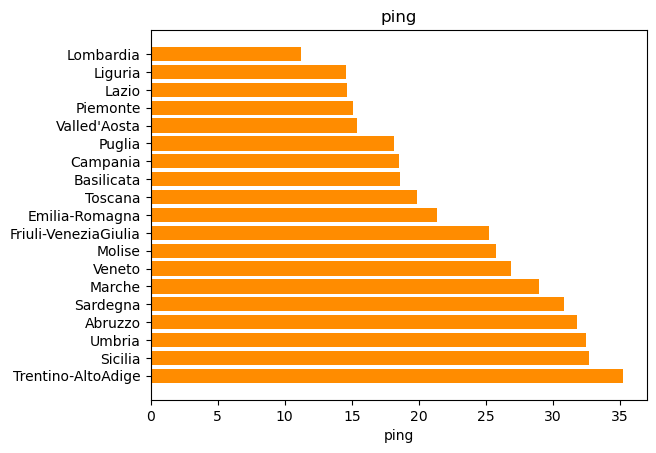

In [31]:
import matplotlib.pyplot as plt

plt.barh(df_ping['Territorio'], df_ping['media_f'], color = '#FF8C00')
plt.title('ping')
plt.xlabel('ping')
plt.show()